##### Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

##### Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

##### Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

S.No.: Serial number

Name: Name of the car which includes brand name and model name

Location: Location in which the car is being sold or is available for purchase

Year: Manufacturing year of the car

Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)

Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

Transmission: The type of transmission used by the car (Automatic/Manual)

Owner: Type of ownership

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in CC

Power: The maximum power of the engine in bhp

Seats: The number of seats in the car

New_Price: The price of a new car of the same model in dollars

Price: The price of the used car in dollars

In [92]:
#Import Libraries 

In [93]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to plot univariate and bivariate plot
from utils import histogram_boxplot, labeled_barplot

# to normalize the data
from sklearn.preprocessing import StandardScaler


In [94]:
# Load Data 
df = pd.read_csv("used_cars_data-1.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [95]:
df["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [96]:
# drop s/no as pandas will create its own default 
df.drop("S.No.", axis = 1, inplace = True)

In [97]:
# Let's look at the statistical summary of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7078,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# check shape 
df.shape

(7253, 13)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


In [100]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [101]:
# Drop Na of the lists alongside the Target values 
df.dropna(subset = ["Engine", "Power", "Seats", "Mileage", "Price"] , inplace=True)

In [102]:
df["Price"].shape

(5872,)

In [103]:
df.shape

(5872, 13)

In [104]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [105]:
df["Fuel_Type"] = df["Fuel_Type"].transform(lambda x: x if x in ["Diesel", "Petrol"] else "Others")

In [106]:
df["Fuel_Type"].unique()

array(['Others', 'Diesel', 'Petrol'], dtype=object)

In [107]:
# using a km/kg equivalent to 1.40km/l conversion rate and creating a new column having the metric as a Column attribute with the column name  
Mileage_New= []
for i in df["Mileage"]:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Mileage_New.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Mileage_New.append(float(i))
df["Mileage_KMPL"] = Mileage_New

In [108]:
# df["Names"]=df["Name"].transform(lambda x: x.split(" ")[0])

In [109]:
#I dropped name, location and Year as they are external features to components that will contribute to the model; hence was dropped. 
df.drop(["Name", "Location","Year"], axis = 1, inplace =True)

In [110]:
# Modifying the Power column to have a "bhp" as a metric to its column and removing the bhp from the column elements  
Power_bhp= []
for i in df["Power"]:
    if str(i).endswith('bhp'):
        i = i[:-4]
        i = float(i)
        Power_bhp.append(i)
                                        

In [111]:
df["Power_bhp"] = Power_bhp
df["Power_bhp"] 

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power_bhp, Length: 5872, dtype: float64

In [112]:
# Modifying the Engine column to have a "CC - Cylinder Capacity" as a metric to its column and removing the CC from the column elements  
Engine_CC= []
for i in df["Engine"]:
    if str(i).endswith('CC'):
        i = i[:-4]
        i = float(i)
        Engine_CC.append(i)

In [113]:
df["Engine_CC"] =  Engine_CC

In [114]:
# I decided to drop the these list of column as the new Engine, Power and Mileage column are same version except that it now has its metric spelt with the column name 
df.drop(["Mileage", "Engine", "Power"], axis = 1, inplace = True) 

In [115]:
# Let's look at the statistical summary of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Kilometers_Driven,5872.0,NaN,NaN,NaN,58316.999149,92169.410006,171.0,33422.5,52609.0,72402.75,6500000.0
Fuel_Type,5872,3,Diesel,3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5872,2,Manual,4170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5872,4,First,4839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,5872.0,NaN,NaN,NaN,5.283719,0.805081,2.0,5.0,5.0,5.0,10.0
New_Price,5872.0,NaN,NaN,NaN,21.635792,24.278063,3.91,7.96,11.3,23.1525,375.0
Price,5872.0,NaN,NaN,NaN,9.603919,11.249453,0.44,3.5175,5.75,10.0,160.0
Mileage_KMPL,5872.0,NaN,NaN,NaN,18.134156,4.695584,0.0,15.0,18.0,21.0,46.956
Power_bhp,5872.0,NaN,NaN,NaN,113.276894,53.881892,34.2,75.0,97.7,138.1,560.0
Engine_CC,5872.0,NaN,NaN,NaN,161.950102,60.21374,62.0,119.0,149.0,199.0,599.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  5872 non-null   int64  
 1   Fuel_Type          5872 non-null   object 
 2   Transmission       5872 non-null   object 
 3   Owner_Type         5872 non-null   object 
 4   Seats              5872 non-null   float64
 5   New_Price          5872 non-null   float64
 6   Price              5872 non-null   float64
 7   Mileage_KMPL       5872 non-null   float64
 8   Power_bhp          5872 non-null   float64
 9   Engine_CC          5872 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 504.6+ KB


In [117]:
# Convert seat to a category type 
df["Seats"] = df["Seats"].astype("category")

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Kilometers_Driven  5872 non-null   int64   
 1   Fuel_Type          5872 non-null   object  
 2   Transmission       5872 non-null   object  
 3   Owner_Type         5872 non-null   object  
 4   Seats              5872 non-null   category
 5   New_Price          5872 non-null   float64 
 6   Price              5872 non-null   float64 
 7   Mileage_KMPL       5872 non-null   float64 
 8   Power_bhp          5872 non-null   float64 
 9   Engine_CC          5872 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 464.8+ KB


## EDA 

In [119]:
df.head(2)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_KMPL,Power_bhp,Engine_CC
0,72000,Others,Manual,First,5.0,5.51,1.75,37.24,58.16,99.0
1,41000,Diesel,Manual,First,5.0,16.06,12.50,19.60,126.20,158.0


In [120]:
# Using the Utility Function for Visualising 
from utils import histogram_boxplot, labeled_barplot

### Univariate Plotting to show the probabaility distribution

#### Price the Target column 

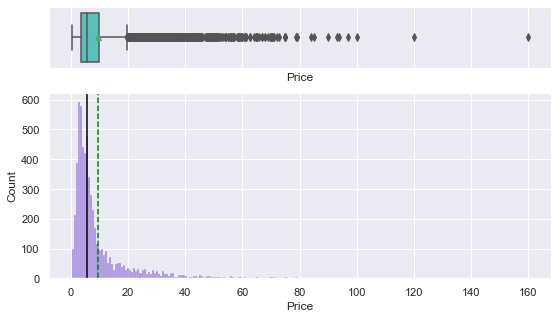

In [121]:
histogram_boxplot(data = df, feature = "Price")

#### Transforming the price and determining the distribution 

In [122]:
df["Log_Price"] = np.log(df["Price"])


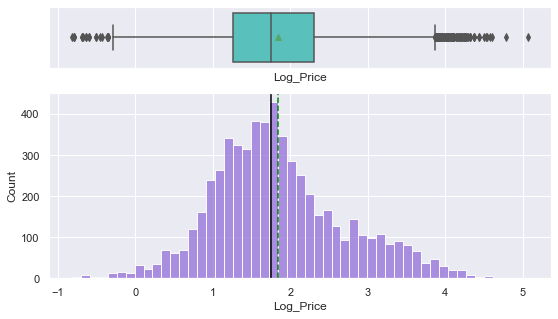

In [123]:
histogram_boxplot(data = df, feature = "Log_Price")

##### Observations 

1. There are outliers at the the iupper and lower limit; having taken the log of the the target, the distribution now obey linearity rule to a greta extent except for Outliers that will be treated 

#### Observations and Actions 
1. As can see our Target Variable is right skewed from the probability distribution which requires a correction in order to obey the linearity rule; hence, a log of the variable will be required 
2. There seem outliers at the upper limit which is also noted for further action 

#### New Price Column Probability Distribution 

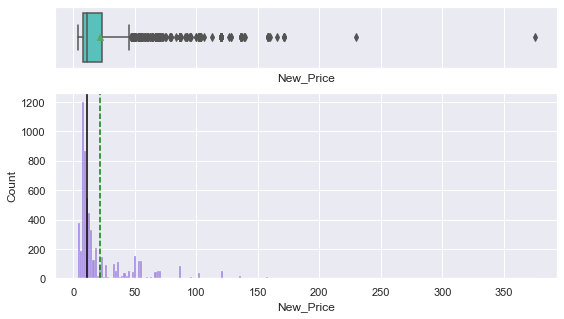

In [124]:
histogram_boxplot(data = df, feature = "New_Price")

# This is right skewwed and we have an average cost of new car fall at about 20-25million DOllars 

#### Kilometers_Driven

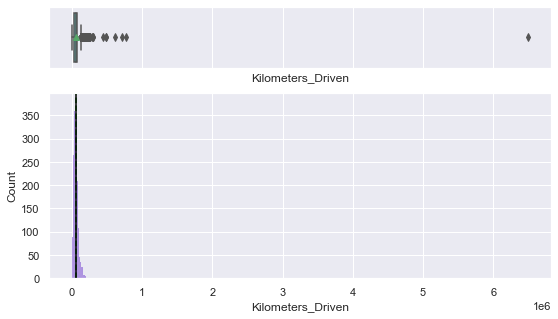

In [125]:
histogram_boxplot(data = df, feature = "Kilometers_Driven")

Observations 

The Kilometer driven Column is right skewwed and there are outliers to the Upper limit 

#### Mileage Distribution Plot 

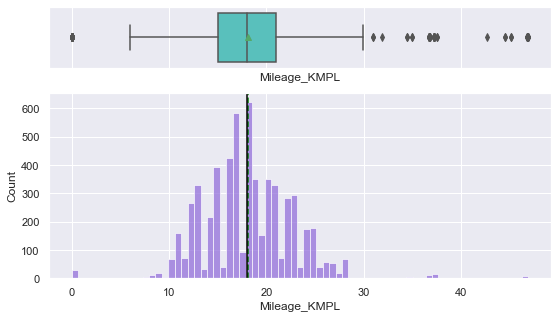

In [126]:
histogram_boxplot(data = df, feature = "Mileage_KMPL")
# The Mileage is normally distributed with outliers in the upper limit  

#### Brake Horse Power Distribution Plot 

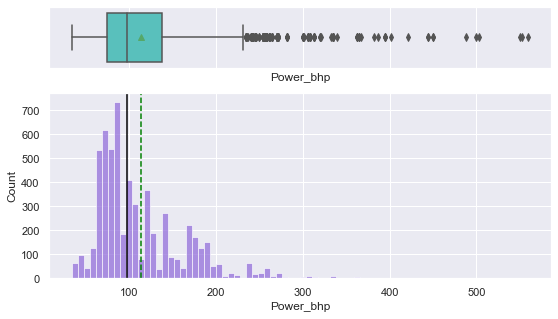

In [127]:
histogram_boxplot(data = df, feature = "Power_bhp")
# The brake horse Power is close to a normally distributed plot and outliers at the upper limit  

#### Engine Cylinder Capacity Distribution Plot 

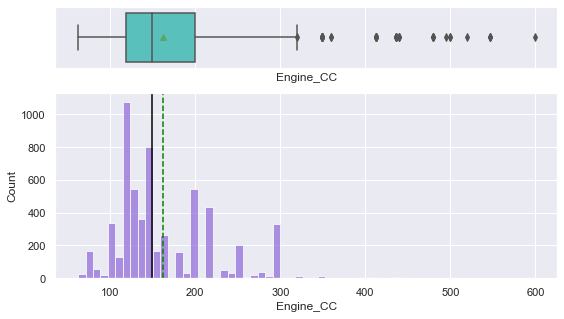

In [128]:
histogram_boxplot(data = df, feature = "Engine_CC")
# The Engine Cylinder Capacity is a distribution curve and its close to a normally distribution plot; also, having otliers at the upper limit 

#### CATEGORICAL PLOTS 

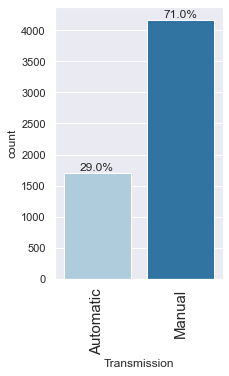

In [129]:
labeled_barplot(df, "Transmission", perc=True)
# It is clear that we have a larger number of cars with Manual form of transmission in the dataset 

In [130]:
df.columns

Index(['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'New_Price', 'Price', 'Mileage_KMPL', 'Power_bhp', 'Engine_CC',
       'Log_Price'],
      dtype='object')

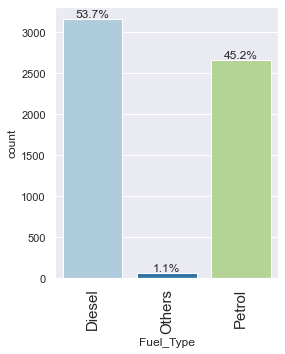

In [131]:
labeled_barplot(df, "Fuel_Type", perc=True)
# It is seen that more percentage of the Car uses Diesel follow by the cars in the petrol category; less than 2% uses CNG, LPG and Electric 

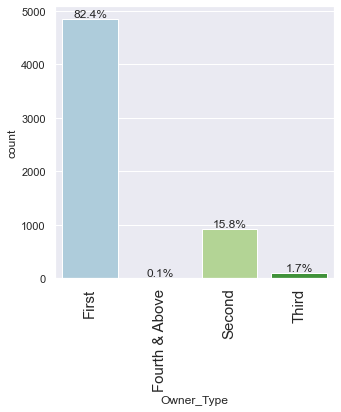

In [132]:
labeled_barplot(df, "Owner_Type", perc=True)
# It is seen that 98% of the cars fall in the first and second hand user which is a function of how durable it will be, although still dependent of other variables 

C:\Users\MR OLAWALE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


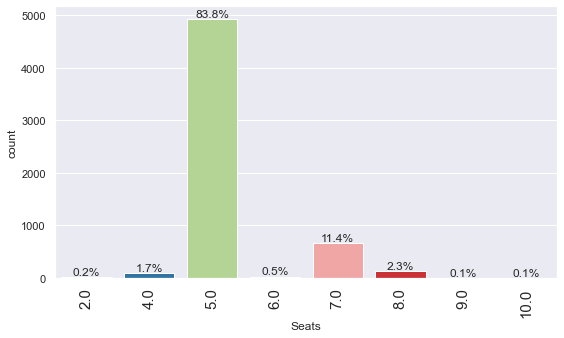

In [133]:
labeled_barplot(df, "Seats", perc=True)
# Cars with 5nos seats have higher frequency than others 

In [134]:
df.columns

Index(['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'New_Price', 'Price', 'Mileage_KMPL', 'Power_bhp', 'Engine_CC',
       'Log_Price'],
      dtype='object')

### BIVARIATE ANALYSIS 

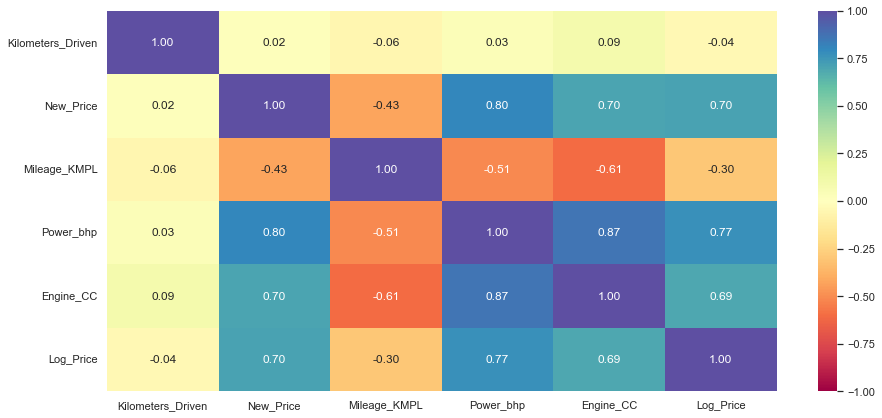

In [135]:
df.drop('Price', axis=1, inplace=True)
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations 

1. It is clear from the heatmap that Power and Engine will contribute greatly to the Model perfromance 
2. There is a Multicollinearity issue between the Power-NewPrice, Engine-Power and the NewPrice-Engine Variables which will require regularisation for help correct this 

In [136]:
df.columns

Index(['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'New_Price', 'Mileage_KMPL', 'Power_bhp', 'Engine_CC', 'Log_Price'],
      dtype='object')

#### Engine and the Target plotting  

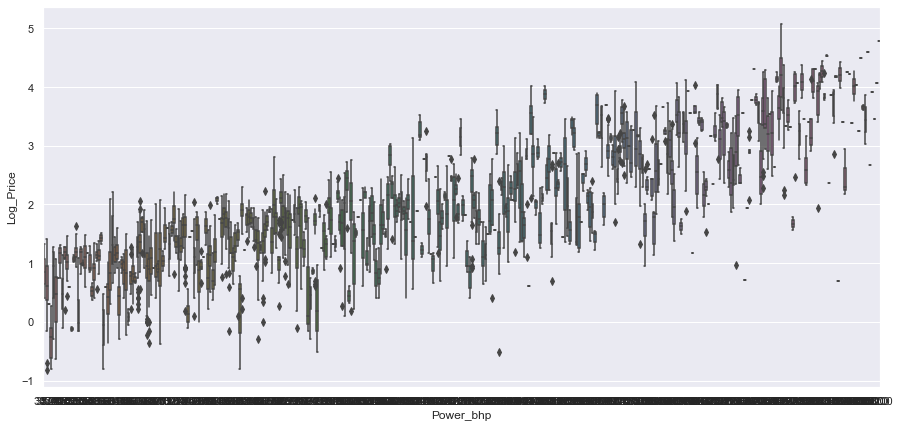

In [137]:
plt.figure(figsize=(15, 7))
sns.boxplot(y="Log_Price", x="Power_bhp", data=df)
plt.show()
#It is clear that there is a linearity rule between the target variable:Log Price  and the Engine 

#### Target and Engine 

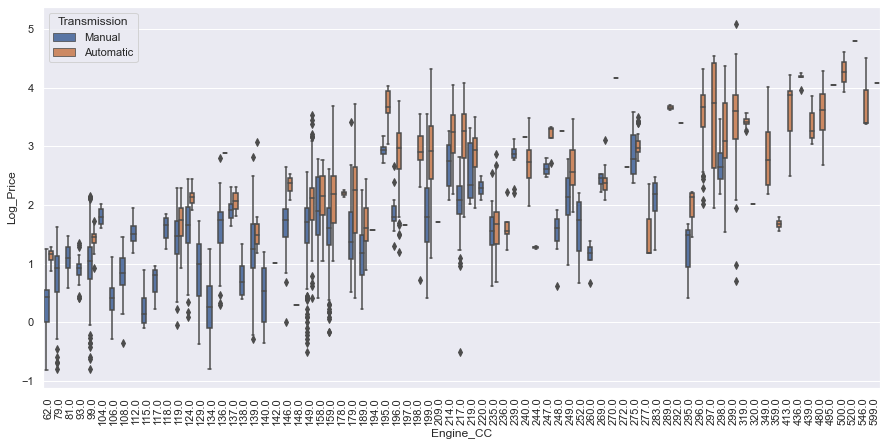

In [138]:
plt.figure(figsize=(15, 7))
sns.boxplot(y="Log_Price", x="Engine_CC", data=df, hue = "Transmission")
plt.xticks(rotation = 90)
plt.show()
#There is a linear relationship between the target and the variable

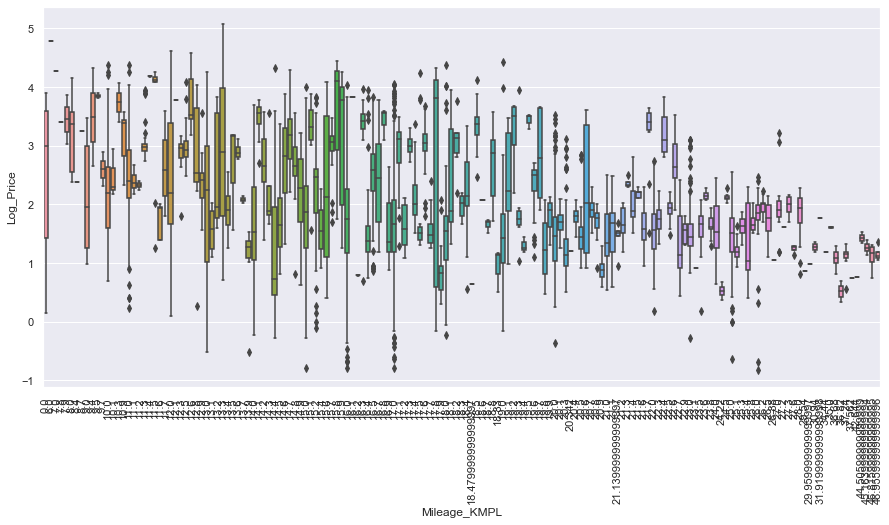

In [139]:
plt.figure(figsize=(15, 7))
sns.boxplot(y="Log_Price", x="Mileage_KMPL", data=df)
plt.xticks(rotation = 90)
plt.show()
#There is also a linear relationship between the Log Price and the Mileage; although, a negative relationship  

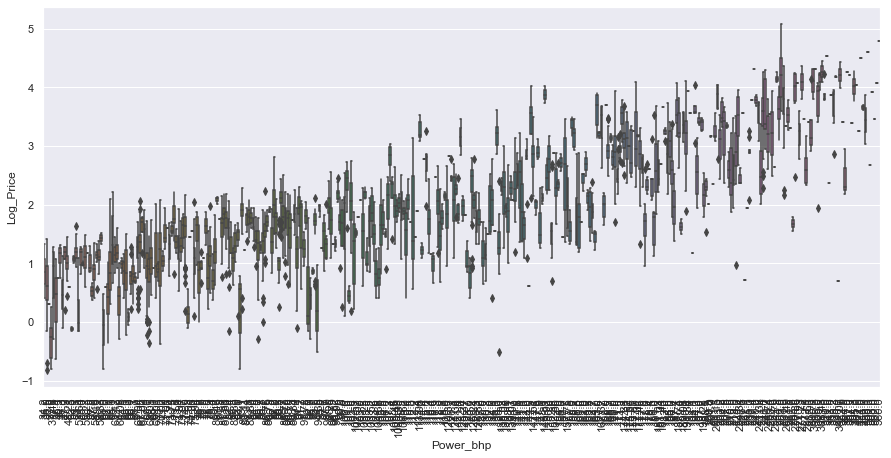

In [140]:
plt.figure(figsize=(15, 7))
sns.boxplot(y="Log_Price", x="Power_bhp", data=df)
plt.xticks(rotation = 90)
plt.show()

#### Outlier detection 

In [141]:
num_cols = df[['Kilometers_Driven','Power_bhp', 'Engine_CC', 'Log_Price','New_Price', "Mileage_KMPL"]].columns.to_list()
num_cols.remove('Log_Price')

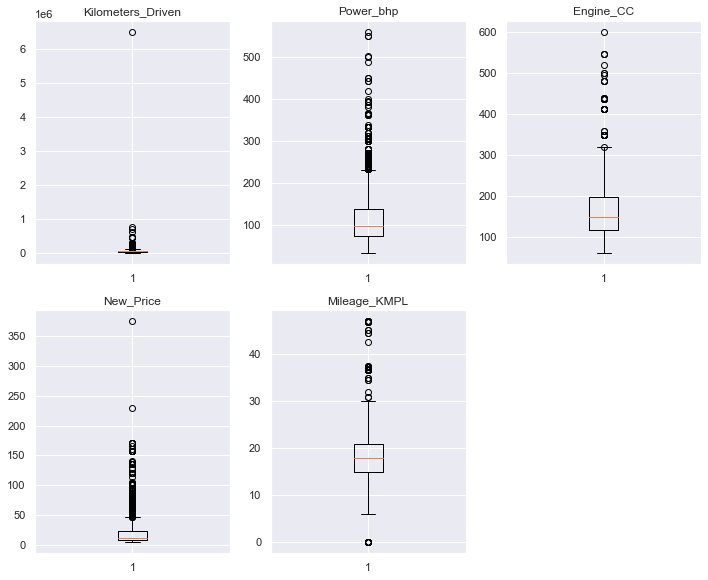

In [142]:
# first creat a figure and set the figsize
plt.figure(figsize=(10,20))

# for each of the columns, itirate to create a boxplot

for ind, var in enumerate(num_cols):
    #create a subplot
    plt.subplot(5, 3,ind + 1)# gridspec_kw=ind + 1)
    plt.tight_layout()  # to avoid the title from overlapping
    plt.boxplot(df[var])
    plt.title(var)

In [143]:
def outlier_treat(df, col):
    lower = df[col].quantile(0.25)
    upper = df[col].quantile(0.75)
    iqr = upper - lower
    
    lower_clip = lower - 1.5 * iqr
    upper_clip = upper + 1.5 * iqr
    
    df[col] = np.clip(df[col], lower_clip, upper_clip)
    return df

def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = outlier_treat(df, c)

    return df

In [144]:
df = treat_outliers_all(df, num_cols)
df

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Mileage_KMPL,Power_bhp,Engine_CC,Log_Price
0,72000.0,Others,Manual,First,5.0,5.51000,30.0,58.16,99.0,0.559616
1,41000.0,Diesel,Manual,First,5.0,16.06000,19.6,126.20,158.0,2.525729
2,46000.0,Petrol,Manual,First,5.0,8.61000,18.0,88.70,119.0,1.504077
3,87000.0,Diesel,Manual,First,7.0,11.27000,20.7,88.76,124.0,1.791759
4,40670.0,Diesel,Automatic,Second,5.0,45.94125,15.0,140.80,196.0,2.875822
...,...,...,...,...,...,...,...,...,...,...
6014,27365.0,Diesel,Manual,First,5.0,7.88000,28.0,74.00,124.0,1.558145
6015,100000.0,Diesel,Manual,First,5.0,8.23000,24.0,71.00,112.0,1.386294
6016,55000.0,Diesel,Manual,Second,8.0,11.67000,14.0,112.00,249.0,1.064711
6017,46000.0,Petrol,Manual,First,5.0,5.51000,18.0,67.10,99.0,0.974560


### Build Model 

In [145]:
# define the independent and Dependent variable 

x = df.drop(["Log_Price"], axis=1)

y = df["Log_Price"]

In [146]:
x

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Mileage_KMPL,Power_bhp,Engine_CC
0,72000.0,Others,Manual,First,5.0,5.51000,30.0,58.16,99.0
1,41000.0,Diesel,Manual,First,5.0,16.06000,19.6,126.20,158.0
2,46000.0,Petrol,Manual,First,5.0,8.61000,18.0,88.70,119.0
3,87000.0,Diesel,Manual,First,7.0,11.27000,20.7,88.76,124.0
4,40670.0,Diesel,Automatic,Second,5.0,45.94125,15.0,140.80,196.0
...,...,...,...,...,...,...,...,...,...
6014,27365.0,Diesel,Manual,First,5.0,7.88000,28.0,74.00,124.0
6015,100000.0,Diesel,Manual,First,5.0,8.23000,24.0,71.00,112.0
6016,55000.0,Diesel,Manual,Second,8.0,11.67000,14.0,112.00,249.0
6017,46000.0,Petrol,Manual,First,5.0,5.51000,18.0,67.10,99.0


In [147]:
# creating dummy variables
X = pd.get_dummies(x, drop_first=True)   #Recall we have important variable/Column in objects which require enconding(One hot encoding)
X

,Kilometers_Driven,New_Price,Mileage_KMPL,Power_bhp,Engine_CC,Fuel_Type_Others,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,72000.0,5.51000,30.0,58.16,99.0,1,0,1,0,0,0,0,1,0,0,0,0,0
1,41000.0,16.06000,19.6,126.20,158.0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,46000.0,8.61000,18.0,88.70,119.0,0,1,1,0,0,0,0,1,0,0,0,0,0
3,87000.0,11.27000,20.7,88.76,124.0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,40670.0,45.94125,15.0,140.80,196.0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,27365.0,7.88000,28.0,74.00,124.0,0,0,1,0,0,0,0,1,0,0,0,0,0
6015,100000.0,8.23000,24.0,71.00,112.0,0,0,1,0,0,0,0,1,0,0,0,0,0
6016,55000.0,11.67000,14.0,112.00,249.0,0,0,1,0,1,0,0,0,0,0,1,0,0
6017,46000.0,5.51000,18.0,67.10,99.0,0,1,1,0,0,0,0,1,0,0,0,0,0


In [148]:
# splitting the data with a train size of 80% i.e test size = 20%
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [149]:
# Print the shape of the train and test sets  
print (x_train.shape, x_test.shape)

(4697, 18) (1175, 18)


#### NORMALIZATION 

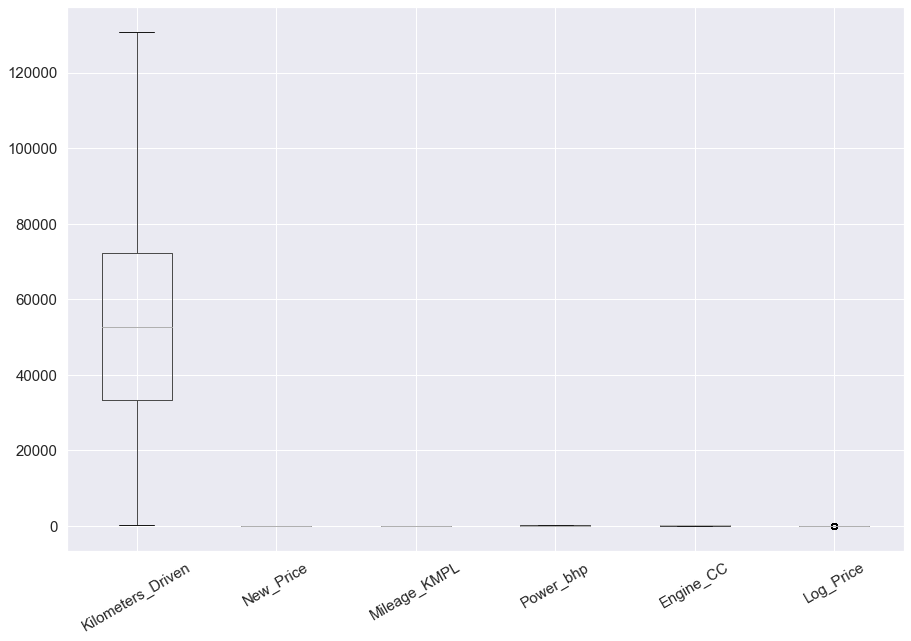

In [150]:
df.boxplot(figsize = (15,10), fontsize = 15, rot = 30);
plt.show()

####  As can see from the box plot, there seem to be a dominance of one variable over the other; hence need for a normalization  before carryingout our model 

In [151]:
from  sklearn.preprocessing  import MaxAbsScaler

scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)

x_test_sc = scaler.transform(x_test)

In [152]:
# Instantiate and fit model to data 

lin_reg = LinearRegression()

lin_reg.fit(x_train_sc, y_train)

LinearRegression()

In [153]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0],
    )

    return df_perf

In [154]:
# Checking model performance on train set
model_performance_regression(lin_reg, x_train_sc, y_train)


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.388806,0.300626,0.796523,0.79574,inf


In [155]:
# Checking model performance on test set
model_performance_regression(lin_reg, x_test_sc, y_test)


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.382831,0.301337,0.806816,0.803808,inf


In [156]:
df.columns

Index(['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'New_Price', 'Mileage_KMPL', 'Power_bhp', 'Engine_CC', 'Log_Price'],
      dtype='object')

### PERFORM REGULARIZATION

In [157]:
ridge = Ridge()

In [158]:
ridge.fit(x_train_sc, y_train)

Ridge()

In [159]:
ridge.coef_
ridge.intercept_

1.8369016747342326

In [160]:
print("Training performance:{:.3f}".format(ridge.score(x_train_sc, y_train)))
print("Testing performance:{:.3f}".format(ridge.score(x_test_sc, y_test)))

Training performance:0.797
Testing performance:0.807


In [161]:
model_performance_regression(ridge, x_train_sc, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.388807,0.300619,0.796522,0.795739,inf


In [162]:
model_performance_regression(ridge, x_test_sc, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.382823,0.301322,0.806824,0.803816,inf


### Lasso Regression

In [163]:
lasso = Lasso()

In [164]:
lasso.fit(x_train_sc, y_train) #Fit model 

Lasso()

In [165]:
#Model accuracy of training and testing sets 
lasso.score(x_train_sc, y_train) #LAsso was too harsh giving those sets values; an hyper parameter tunning can come in here  

0.0

In [166]:
alpha = [0.1,1,  10, 100, 1000]
for alpha in alpha: 
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_train_sc, y_train) #Fit model 
    print(lasso.fit(x_train_sc, y_train)) #Fit model 
    print(lasso.score(x_train_sc, y_train))
    print( "Train Performance", model_performance_regression(lasso, x_train_sc, y_train))
    #print( model_performance_regression(lasso, x_train_sc, y_train))
    print( "Test Performance", model_performance_regression(lasso, x_test_sc, y_test))
    print("-------------------------------------------------------")

Lasso(alpha=0.1)
0.724347160078302
Train Performance        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.452539  0.352887   0.724347        0.723287   inf
Test Performance        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.448559  0.358489   0.734787        0.730657   inf
-------------------------------------------------------
Lasso(alpha=1)
0.0
Train Performance        RMSE      MAE  R-squared  Adj. R-squared  MAPE
0  0.861936  0.66859        0.0       -0.003848   inf
Test Performance        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.872077  0.675547  -0.002457       -0.018066   inf
-------------------------------------------------------
Lasso(alpha=10)
0.0
Train Performance        RMSE      MAE  R-squared  Adj. R-squared  MAPE
0  0.861936  0.66859        0.0       -0.003848   inf
Test Performance        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.872077  0.675547  -0.002457       -0.018066   inf
-----------------------------------------------------

#####  Its clear that Lasso performance reduces as alpha increases from o.1

### Forward Feature Selection Using SequentialFeatureSelector

In [167]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [168]:
 # import the SequentialFeatureSelector from the feature_selection module

from mlxtend.feature_selection import SequentialFeatureSelector

In [169]:
x_train.shape[1]

18

In [170]:
# create an instance of the linear model
lin_reg3 = LinearRegression()

# create an instance of the sequential feature selector
sfs = SequentialFeatureSelector (estimator = lin_reg3, k_features =x_train.shape[1],  n_jobs = -1, verbose = 2)

# build the sequential feature selector

sfs.fit(x_train_sc, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    5.6s finished

[2023-02-05 20:18:03] Features: 1/18 -- score: 0.6257440499553881[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2023-02-05 20:18:03] Features: 2/18 -- score: 0.6817258561185817[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2023-02-05 20:18:03] Features: 3/18 -- score: 0.7447535697813951[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2023-02-05 20:18:03] Features: 4/18 -- score: 0.7625818295050147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(18, 18),
                          n_jobs=-1, scoring='r2', verbose=2)

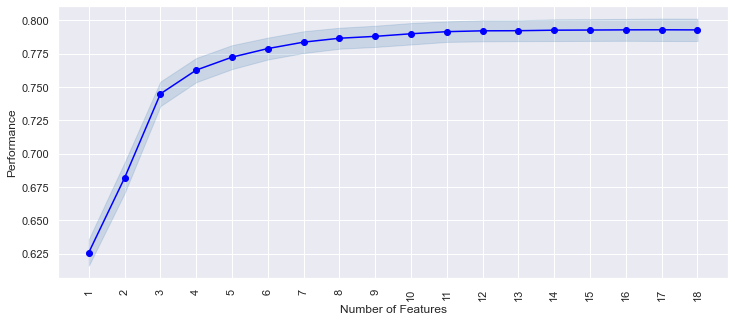

In [171]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize = (12, 5))
plt.xticks(rotation = 90)
plt.show()


**Observations**

* The model performance improved; however, from k-features = 10, there wasn't a sharp improvement; hence 10nos features for selection and rebuild model  
* We will take 10 as the number of features to consider.

In [172]:
# create an instance of the linear model
lin_reg4 = LinearRegression()

# create an instance of the sequential feature selector
sfs = SequentialFeatureSelector (estimator = lin_reg4, k_features = 10,  n_jobs = -1, verbose = 2)

# build the sequential feature selector

sfs.fit(x_train_sc, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2023-02-05 20:18:05] Features: 1/10 -- score: 0.6257440499553881[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2023-02-05 20:18:05] Features: 2/10 -- score: 0.6817258561185817[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2023-02-05 20:18:06] Features: 3/10 -- score: 0.7447535697813951[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2023-02-05 20:18:06] Features: 4/10 -- score: 0.7625818295050147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(10, 10),
                          n_jobs=-1, scoring='r2', verbose=2)

x_train.columns

In [173]:
sfs.k_feature_idx_

(0, 1, 2, 3, 6, 7, 9, 10, 14, 15)

In [174]:
feat_list_index = list(sfs.k_feature_idx_) #turn to a list  
feat_cols =   x_train.columns [feat_list_index] #Recall list indexing  
feat_cols

Index(['Kilometers_Driven', 'New_Price', 'Mileage_KMPL', 'Power_bhp',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Owner_Type_Third', 'Seats_7.0', 'Seats_8.0'],
      dtype='object')

In [175]:
x_train_new = x_train [feat_cols]  
x_train_new

,Kilometers_Driven,New_Price,Mileage_KMPL,Power_bhp,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Seats_7.0,Seats_8.0
3957,53886.0,4.78000,25.1,53.30,1,1,0,0,0,0
5389,100400.0,7.63000,25.0,69.00,0,1,0,0,0,0
1472,9500.0,21.77000,14.6,149.92,1,0,0,0,0,0
3679,10000.0,45.94125,19.2,167.62,0,0,0,0,0,0
1305,31000.0,45.94125,17.0,190.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5059,58829.0,9.89000,24.0,88.50,0,1,0,0,0,0
3351,32720.0,10.25000,23.0,90.00,0,1,0,0,0,0
1699,90000.0,35.29000,10.0,143.00,0,1,0,0,1,0
2683,26400.0,5.87000,23.0,67.04,1,1,0,0,0,0


In [176]:
x_test_new = x_test [feat_cols]
x_test_new 

,Kilometers_Driven,New_Price,Mileage_KMPL,Power_bhp,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Seats_7.0,Seats_8.0
5642,130873.125,8.80000,15.0,94.00,1,1,0,1,0,0
3499,41290.000,18.86500,16.0,140.00,0,1,1,0,1,0
4478,75000.000,11.68500,17.0,68.00,0,1,1,0,0,0
995,11000.000,34.63000,15.0,120.70,1,0,0,0,0,0
4022,32000.000,22.66000,14.2,138.03,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1473,130873.125,37.17000,11.0,169.00,0,0,0,0,1,0
3603,5000.000,4.90000,25.1,53.30,1,1,0,0,0,0
889,51530.000,5.51000,18.0,67.10,1,1,0,0,0,0
3839,117236.000,45.94125,11.0,190.00,0,0,1,0,1,0


### Re-build the Models with the new features

In [177]:
scaler_new = StandardScaler()

In [178]:
x_train_new_sc = scaler_new.fit_transform(x_train_new) #Only the train and test sets of the numerical values are being scaled 
x_test_new_sc = scaler_new.transform(x_test_new)

In [179]:
lin_reg2= LinearRegression()
lin_reg2.fit(x_train_new_sc, y_train)

LinearRegression()

#### Model train Performance 

In [180]:
model_performance_regression(lin_reg2, x_train_new_sc, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.392876,0.303548,0.792241,0.791798,inf


#### Model Test Perfromance 

In [181]:
model_performance_regression(lin_reg2, x_test_new_sc, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.388069,0.304912,0.801494,0.799789,inf


## Insights

The train and test R^2 are 0.79 and 0.80, indicating that the model explains 79% and 80% of the total variation in the train and test sets respectively. 

- Using the RMSE as a bench for performance check on all the algorithm, it is seen that the model performed well on all sampled Algorithm except for Lasso that seem hash which upon hyper parameter tunning gave a more improved result but not as other Algorithm

- Conclusively. the Linear Model can be deployed for prediction/forecast


## Business Recommendations

Our Forecast is highly dependent on below variables: 

1. Kilometer driven 
2. New Price 
3. Mileage 
4. Power 
5. No of Seats  and Transmission type 
